# Support vector Regressor implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[ 0.20851854, -1.39686036],
       [ 0.21264834, -1.6196494 ],
       [-0.65438626,  0.07491781],
       ...,
       [-0.91757302, -1.15200116],
       [-1.53364968, -0.23225873],
       [-0.04109245, -1.20802522]])

In [5]:
X.shape

(1000, 2)

In [6]:
y.shape

(1000,)

In [7]:
X[0]

array([ 0.20851854, -1.39686036])

In [8]:
pd.DataFrame(X)

,0,1
0,0.208519,-1.396860
1,0.212648,-1.619649
2,-0.654386,0.074918
3,1.058951,-0.339260
4,-1.118564,0.607566
...,...,...
995,-0.422400,-0.263841
996,0.687828,-1.267766
997,-0.917573,-1.152001
998,-1.533650,-0.232259


<Axes: xlabel='0', ylabel='1'>

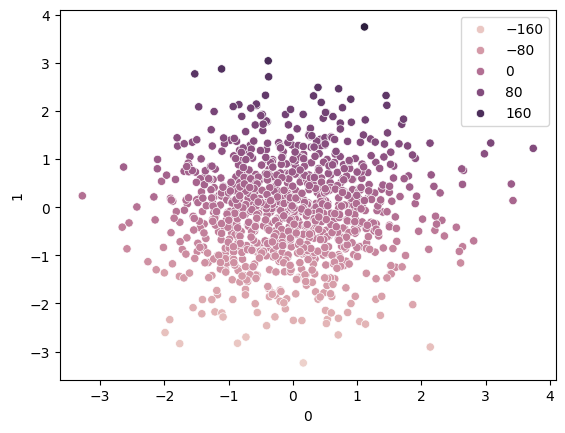

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [12]:
from sklearn.svm import SVR

In [13]:
svr=SVR(kernel='linear')

In [14]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [15]:
svr.coef_

array([[ 3.74283677, 53.66795675]])

In [16]:
y_pred = svr.predict(X_test)

In [18]:
from sklearn.metrics import r2_score

In [19]:
print(r2_score(y_test,y_pred))


0.9960370825879369


# Hyperparameter tuning with SVC

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
parameters = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear'],
    'epsilon':[0.1,0.2,0.3]
}

In [22]:
grid = GridSearchCV(svr,param_grid=parameters,refit=True,cv=5,verbose=3)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.966 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.963 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.963 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.965 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.967 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.966 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.963 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.963 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.965 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.967 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [24]:
grid.best_params_

{'C': 1000, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [25]:
y_pred = grid.predict(X_test)
print(r2_score(y_test,y_pred))


0.9961263763440942
